<a href="https://colab.research.google.com/github/homrajkarki555-collab/Data_cleaning_using_pandas/blob/main/Data_cleaning_using_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv("/content/messy_customer_sales_data.csv")

In [6]:
df

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53.0,bangalore,2023-12-31,2025-05-07,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25.0,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [10]:
df.info()  #problem in data tye of  age, Signup_Date and  Last_Purchase_Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


In [9]:
df.describe(). round()

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.0,9177.0,1.020000e+04
mean,29090.0,5.0,4.979974e+09
std,208697.0,3.0,2.902593e+09
min,-500.0,1.0,9.208990e+05
25%,12295.0,3.0,2.449157e+09
50%,24330.0,5.0,4.988639e+09
75%,37130.0,8.0,7.510448e+09
max,9999999.0,10.0,9.994402e+09


In [11]:
df.isnull().sum() #missing values from each colum

,0
Customer_ID,1023
Name,0
Gender,1026
Age,951
City,1016
Signup_Date,0
Last_Purchase_Date,1012
Purchase_Amount,1021
Feedback_Score,1023
Email,0


In [37]:
df.isnull().sum()/len(df)*100 #% of missig values from each colum. eg Customer ID has 10.029% of missing values

,0
Customer_ID,10.029412
Name,0.000000
Gender,10.058824
Age,9.323529
City,9.960784
Signup_Date,0.000000
Last_Purchase_Date,9.921569
Purchase_Amount,10.009804
Feedback_Score,10.029412
Email,0.000000


In [13]:
df[df.duplicated()].shape  #".Shape" is use to see the numner of records that are duplcate. It can be used in descripe,missing values and in ds as well
#with "df.shape"

(15, 12)

In [14]:
df[df.duplicated()] # duplicate values that


,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
2032,CUST2755,Casey Campbell,male,NaN,Hyderabad,2023-12-01,2024-11-04,11778.0,3.0,joseph49@example.com,3844741384,India
3191,NaN,Travis Schneider,f,51.0,NaN,2025-04-20,2025-02-28,48750.0,5.0,bianca77@example.net,7623118785,India
4312,CUST8305,Stanley Cain,FEMALE,51.0,Bangalore,2023-08-14,2024-11-01,11432.0,6.0,calderonbrenda@example.org,4889366037,India
5611,CUST6288,Jonathon Kim,male,46.0,Chennai,2023-11-22,2025-03-21,3301.0,6.0,tparker@example.com,5266662560,India
5680,CUST2695,Lisa Durham,NaN,46.0,Chennai,2021-04-18,2024-10-10,6511.0,3.0,andrew34@example.com,2235480149,India
5899,CUST8841,Amanda Hill,NaN,34.0,chennai,2022-09-11,2025-03-13,42092.0,4.0,ryanriley@example.net,3466026146,India
6070,CUST10780,Emily Smith,NaN,23.0,Kolkata,2023-12-09,2024-10-28,18027.0,5.0,perezchristopher@example.com,3032282870,India
6240,CUST9745,David Morales,NaN,56.0,NaN,2023-02-18,2024-12-14,49107.0,7.0,juliaknapp@example.com,9436163110,India
6425,CUST4631,George Villa,m,26.0,Mumbai,2022-05-21,2025-06-17,NaN,8.0,davidmarquez@example.com,8869465862,India
6498,CUST1711,Stephanie Elliott,NaN,44.0,MUMBAI,2023-05-17,2025-07-12,11349.0,9.0,nfischer@example.com,3270872546,NaN


In [15]:
df['Customer_ID'].value_counts().head(10) #those colums that has the same data but there was some small change due to this it was not reflacted in the duplicate value

,count
Customer_ID,
CUST10800,2
CUST6588,2
CUST9062,2
CUST1852,2
CUST5472,2
CUST4160,2
CUST5019,2
CUST6288,2
CUST8174,2


In [16]:
df[df['Customer_ID']=="CUST10800"] #customer ID CUST10800	has same details just the age catagegory one has "F" and the another has "female" due to this it was not replacted in duplicate date

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
3986,CUST10800,Kevin Clark,F,52.0,Bangalore,2021-06-29,2025-09-12,34914.0,10.0,sandycarey@example.net,2719399414,India
10103,CUST10800,Kevin Clark,female,52.0,Bangalore,2021-06-29,2025-09-12,34914.0,10.0,sandycarey@example.net,2719399414,india


In [33]:
for col in df.columns:   # it tells you in how many different ways the same colume data is written in your data that was missed out from the duplicate value
  if df[col].nunique() <20:  # Gender couls has coumes written as "f","M","m","F","MALE","FEMALE","female" and "male"
    print(df[col].value_counts()) # have to change it and bring it to only two uinque catagoty
    print("-"*50) # same goes for city and country colum # no change in feedback because its a feedback and should be how it is.

Gender
Female    4588
Male      4586
Name: count, dtype: int64
--------------------------------------------------
City
Kolkata       820
Mumbai        812
Chennai       784
Bangalore     773
Hyderabad     770
Delhi         763
CHENNAI       404
KOLKATA       395
MUMBAI        393
hyderabad     384
bangalore     383
DELHI         378
delhi         369
BANGALORE     363
HYDERABAD     360
mumbai        352
chennai       343
kolkata       338
Name: count, dtype: int64
--------------------------------------------------
Feedback_Score
2.0     952
4.0     947
7.0     938
6.0     927
3.0     913
8.0     912
1.0     907
9.0     903
10.0    901
5.0     877
Name: count, dtype: int64
--------------------------------------------------
Country
India      9468
Unknown     732
Name: count, dtype: int64
--------------------------------------------------


In [39]:
#Handelling missing values
# removing  the data that has customer ID missing
df.dropna(subset=['Customer_ID'],inplace=True)

In [18]:
df.isnull().sum()

,0
Customer_ID,1023
Name,0
Gender,1026
Age,951
City,1016
Signup_Date,0
Last_Purchase_Date,1012
Purchase_Amount,1021
Feedback_Score,1023
Email,0


In [17]:
df['Age'].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '26.0 years', '55.0', '69.0',
       '61.0 years', '24.0', '63.0', '19.0', '50.0', '56.0', '36.0',
       '68.0', '43.0', '38.0', '48.0', '27.0', '57.0 years', '23.0',
       '25.0', '66.0', '28.0', '30.0', '44.0', '46.0', '20.0', '37.0',
       '67.0', '51.0', '35.0', '58.0', '29.0', 'nan years', '39.0',
       '49.0', '47.0', '42.0', '54.0', '64.0', '53.0', '60.0',
       '59.0 years', '45.0', '21.0', '34.0', '48.0 years', '46.0 years',
       '33.0', '57.0', '30.0 years', '58.0 years', '35.0 years',
       '34.0 years', '69.0 years', '250', '19.0 years', '27.0 years',
       '53.0 years', '65.0 years', '66.0 years', '44.0 years',
       '49.0 years', '25.0 years', '23.0 years', '62.0 years',
       '41.0 years', '33.0 years', '28.0 years', '22.0 years',
       '20.0 years', '42.0 years', '55.0 years', '45.0 

In [12]:
df['Age'] = df['Age'].astype(str).str.replace(' years', '', case=False) # 1. Remove " years" and "nan years" strings

In [55]:
df['Age'].unique()

array([52., 62., 40., 41., 18., 26., 32., 22., 59., 65., 61., 31., 55.,
       69., 24., 63., 19., 50., 56., 36., 68., 43., 38., 27., 23., 25.,
       66., 28., 30., 46., 48., 20., 37., 67., 51., 35., 58., 29., 39.,
       49., 47., 42., 44., 64., 53., 60., 45., 21., 34., 54., 33., 57.,
        3.])

In [53]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Age'] = pd.to_numeric(
    df['Age'].astype(str).str.replace(' years', '', case=False),
    errors='coerce'
)## replacing the Null values in age colume with the median of age

In [44]:
df

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,Male,52.0,Kolkata,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,Male,NaN,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,India
2,CUST3754,Brittney Martinez,Female,62.0,Hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,Female,40.0,Hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,India
4,CUST5683,Matthew Carroll,Female,41.0,Chennai,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,Female,40.0,NaN,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,Female,NaN,Delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,India
10197,CUST6315,Joshua Martinez,Male,25.0,Hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,Female,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,India


In [48]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

In [21]:
df.isnull().sum()/len(df)*100

,0
Customer_ID,10.029412
Name,0.000000
Gender,10.058824
Age,9.323529
City,9.960784
Signup_Date,0.000000
Last_Purchase_Date,9.921569
Purchase_Amount,10.009804
Feedback_Score,10.029412
Email,0.000000


In [22]:
df['City'].unique()

array([' KOLKATA ', nan, ' hyderabad ', ' CHENNAI ', ' kolkata ',
       ' BANGALORE ', ' Hyderabad ', ' HYDERABAD ', ' Mumbai ',
       ' chennai ', ' Delhi ', ' bangalore ', ' MUMBAI ', ' Bangalore ',
       ' Kolkata ', ' delhi ', ' Chennai ', ' mumbai ', ' DELHI '],
      dtype=object)

In [23]:
df['City']

,City
0,KOLKATA
1,NaN
2,hyderabad
3,hyderabad
4,CHENNAI
...,...
10195,delhi
10196,bangalore
10197,hyderabad
10198,NaN


In [35]:

# 1. Convert to string
# 2. Strip whitespace from both ends
# 3. Capitalize only the first letter (or use .upper() for all caps)
df['City'] = df['City'].str.strip().str.capitalize()

# View the cleaned unique values
print(df['City'].unique())

['Kolkata' nan 'Hyderabad' 'Chennai' 'Bangalore' 'Mumbai' 'Delhi']


In [25]:
df['Gender'].unique()

array(['m ', 'M', 'F', 'FEMALE', 'f ', 'male', 'MALE', 'female', nan],
      dtype=object)

In [32]:
# 1. Standardize text: lowercase and remove spaces
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower()

# 2. Create a mapping dictionary
gender_map = {
    'm': 'Male',
    'male': 'Male',
    'f': 'Female',
    'female': 'Female',
    'nan': 'Unknown'  # Handling the 'nan' string from step 1
}

# 3. Apply the mapping
df['Gender'] = df['Gender'].map(gender_map)

print(df['Gender'].unique())

['Male' 'Female' nan]


In [29]:
df['Country'].unique()

array(['India', 'india', nan, 'InDia', 'IND'], dtype=object)

In [30]:
# 1. Strip spaces and standardize to Title Case (e.g., 'InDia' -> 'India')
df['Country'] = df['Country'].str.strip().str.capitalize()

# 2. Map abbreviations to the full name
# This fixes 'IND' specifically
df['Country'] = df['Country'].replace({'Ind': 'India'})

# 3. Optional: Handle NaN values
df['Country'] = df['Country'].fillna('Unknown')

print(df['Country'].unique())
# Output: ['India', 'Unknown']

['India' 'Unknown']


In [74]:
df.isnull().sum()/len(df)*100 #% of missig values from each colum. eg Customer ID has 10.029% of missing values

,0
Customer_ID,0.0
Name,0.0
Gender,0.0
Age,0.0
City,0.0
Signup_Date,0.0
Last_Purchase_Date,0.0
Purchase_Amount,0.0
Feedback_Score,0.0
Email,0.0


In [58]:
df['Purchase_Amount'].unique()

array([26944., 31745., 39674., ..., 35101., 43832., 18827.])

In [62]:
#replace Purchase amount with its median

# 1. Calculate the median of the column
# Pandas automatically ignores Nulls/NaNs when calculating the median
purchase_median = df['Purchase_Amount'].median()
# 2. Fill the missing values
df['Purchase_Amount'] = df['Purchase_Amount'].fillna(purchase_median)

print(f"Filled missing values with: {purchase_median}")

Filled missing values with: 24187.5


In [67]:
# 1. Calculate the mode
# .mode() returns a Series, so we take index [0]
feedback_mode = df['Feedback_Score'].mode()[0]

# 2. Fill the null values
df['Feedback_Score'] = df['Feedback_Score'].fillna(feedback_mode)

print(f"The most frequent feedback score was: {feedback_mode}")

The most frequent feedback score was: 2.0


In [81]:
# Fill Gender with the most common gender
gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)

# Fill City with the most common city
city_mode = df['City'].mode()[0]
df['City'] = df['City'].fillna(city_mode)

# Fill country with the most common city
Country_mode = df['Country'].mode()[0]
df['Country'] = df['Country'].fillna(Country_mode)

In [72]:
#using the forward fill approch to clean the data for last purchase date

# Ensure the column is in datetime format first
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])

# Fill using the previous row's value
df['Last_Purchase_Date'] = df['Last_Purchase_Date'].ffill()

In [80]:
# Fixing incosistant formatting
##age colume-- fixed
#city column fixed
#country column fixed
#now have to replace country with mode done above









In [88]:
#handeling duplicate
df[df.duplicated()]

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
1956,CUST8512,Matthew Roberts,Male,49.0,Bangalore,2023-04-03,2024-10-08,40325.0,1.0,donna18@example.org,1319901506,India
2110,CUST7014,Phillip Rodriguez,Male,57.0,Hyderabad,2021-07-18,2025-01-22,24187.5,1.0,mooremonique@example.com,1392088762,India
2471,CUST6042,Debra White,Female,64.0,Hyderabad,2021-12-17,2025-02-28,48275.0,6.0,ginakeller@example.com,1128467518,India
2568,CUST3571,Erin Ramirez,Male,21.0,Kolkata,2024-12-06,2024-12-26,7125.0,2.0,hendersonmadison@example.com,6865186381,India
2858,CUST5500,Nicole Mills,Male,60.0,Bangalore,2023-06-08,2024-12-12,7031.0,7.0,nataliehall@example.org,2748671562,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10131,CUST4058,Ryan Myers,Female,25.0,Chennai,2021-05-29,2024-12-12,24187.5,3.0,amberbaker@example.org,1072319959,India
10140,CUST4367,Amber Kennedy,Female,61.0,Bangalore,2023-11-05,2025-01-10,40711.0,8.0,kellifox@example.com,5600790669,India
10158,CUST1317,Ashley Hall,Male,55.0,Bangalore,2021-01-14,2024-10-26,15990.0,9.0,markhardin@example.net,6840741983,India
10182,CUST1740,Eric Rush,Female,38.0,Kolkata,2023-10-12,2024-12-05,12155.0,2.0,llee@example.org,3093645885,India


In [91]:
df[df.duplicated()].shape

(0, 12)

In [92]:
df.drop_duplicates(inplace=True) ##droped the duplicate colums

In [94]:
df['Customer_ID'].value_counts()

,count
Customer_ID,
CUST7652,2
CUST3484,2
CUST9534,2
CUST2905,2
CUST6647,2
...,...
CUST6618,1
CUST2393,1
CUST10645,1


In [103]:
duplicate_count = df['Customer_ID'].duplicated().sum()
print(f"Number of duplicate Customer_IDs: {duplicate_count}")

Number of duplicate Customer_IDs: 0


In [99]:
df[df['Customer_ID']=='CUST7652']

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
126,CUST7652,Denise Flores,Female,31.0,Delhi,2020-12-22,2025-07-12,18572.0,8.0,lambertdavid@example.com,8047340035,Unknown
1236,CUST7652,Denise Flores,Female,31.0,Delhi,2020-12-22,2025-08-04,18572.0,8.0,lambertdavid@example.com,8047340035,India


In [102]:
# Removes duplicates and keeps only the first one found
df = df.drop_duplicates(subset='Customer_ID', keep='first')

In [104]:
#correcting data type
print(df.dtypes)

Customer_ID                   object
Name                          object
Gender                        object
Age                          float64
City                          object
Signup_Date                   object
Last_Purchase_Date    datetime64[ns]
Purchase_Amount              float64
Feedback_Score               float64
Email                         object
Phone_Number                   int64
Country                       object
dtype: object


In [105]:
# 1. Convert Signup_Date to actual datetime
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], errors='coerce')

# 2. Convert Phone_Number to string (to preserve leading zeros)
df['Phone_Number'] = df['Phone_Number'].astype(str)

# 3. Optional: Convert Feedback_Score to Int (if it's a 1-5 scale)
# This looks cleaner than 4.0, 5.0, etc.
df['Feedback_Score'] = df['Feedback_Score'].astype('Int64')

print(df.dtypes)

Customer_ID                   object
Name                          object
Gender                        object
Age                          float64
City                          object
Signup_Date           datetime64[ns]
Last_Purchase_Date    datetime64[ns]
Purchase_Amount              float64
Feedback_Score                 Int64
Email                         object
Phone_Number                  object
Country                       object
dtype: object


In [ ]:
df

In [109]:
df['Purchase_Amount'].unique()

array([26944., 31745., 39674., ..., 35101., 43832., 18827.])

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

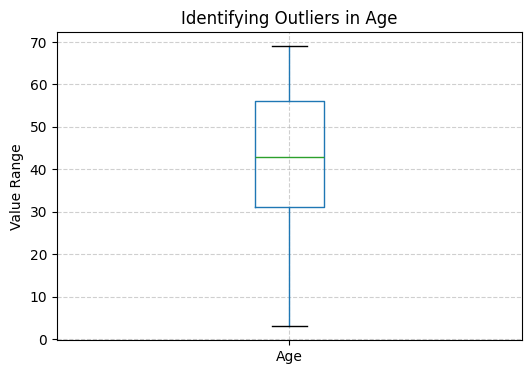

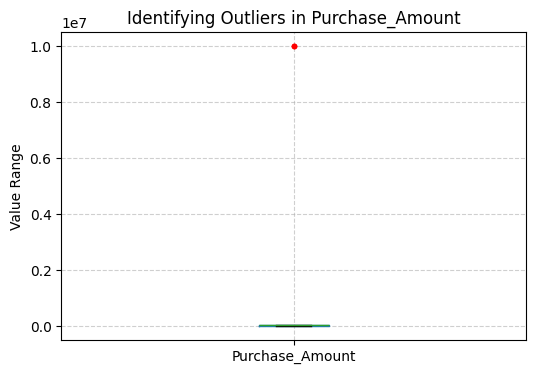

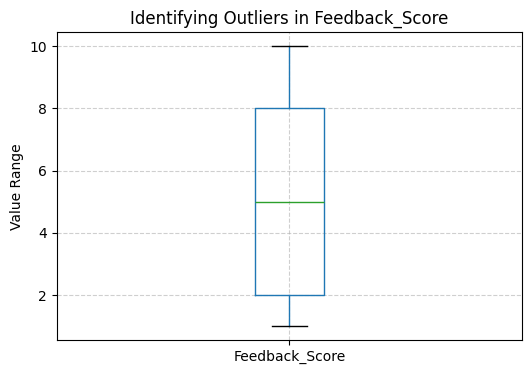

In [124]:
# Set up the figure for multiple plots
cols_to_plot = ['Age', 'Purchase_Amount', 'Feedback_Score']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    # 'sym' defines the symbol for outliers (e.g., 'r.' for red dots)
    df.boxplot(column=[col], sym='r.')
    plt.title(f'Identifying Outliers in {col}')
    plt.ylabel('Value Range')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [114]:
from scipy import stats

In [181]:
stats.zscore(df['Purchase_Amount'])

array([-0.0078141 ,  0.01651882,  0.0567054 , ...,  0.03352805,
        0.0777794 , -0.04895352])

In [127]:
Z_score= np.abs(stats.zscore(df['Purchase_Amount']))

In [145]:
(Z_score).any(axis=0)

np.True_

In [159]:
negatives = (df['Purchase_Amount'] < 0).sum()
zeros = (df['Purchase_Amount'] == 0).sum()

print(f"Found {negatives} negative values and {zeros} zero values.")

Found 3 negative values and 5 zero values.


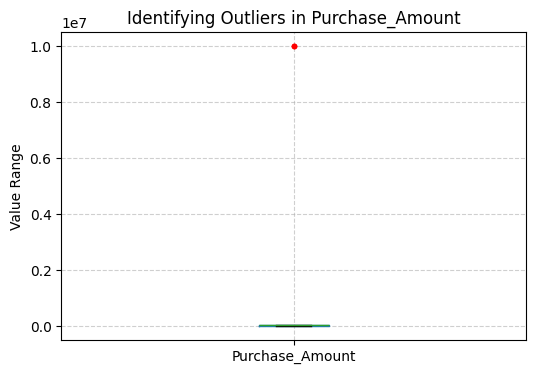

In [166]:
cols_to_plot = ['Purchase_Amount']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    # 'sym' defines the symbol for outliers (e.g., 'r.' for red dots)
    df.boxplot(column=[col], sym='r.')
    plt.title(f'Identifying Outliers in {col}')
    plt.ylabel('Value Range')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [175]:
print(f"Original Skew: {df['Purchase_Amount'].skew():.2f}")
print(f"Cleaned Skew: {df_final['Purchase_Amount'].skew():.2f}")

Original Skew: 50.29
Cleaned Skew: 0.06


In [172]:
negatives = (df['Purchase_Amount'] < 0).sum()
zeros = (df['Purchase_Amount'] == 0).sum()

print(f"Found {negatives} negative values and {zeros} zero values.")

Found 0 negative values and 0 zero values.


In [179]:
df_final

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country,Z_Score
0,CUST4371,Paul Wilson,Male,52.0,Kolkata,2025-06-26,2025-05-17,26944.0,1,peckvictoria@example.com,2131107701,India,-0.007814
2,CUST3754,Brittney Martinez,Female,62.0,Hyderabad,2023-11-05,2024-12-08,31745.0,2,tara39@example.org,8981006345,India,0.016518
3,CUST2934,Brenda Pierce,Female,40.0,Hyderabad,2022-03-13,2025-10-02,39674.0,1,berrynancy@example.org,8228064204,India,0.056702
4,CUST5683,Matthew Carroll,Female,41.0,Chennai,2024-04-05,2024-12-15,24187.5,8,denise84@example.org,2665569480,India,-0.021783
6,CUST3651,Laura Vincent,Male,18.0,Bangalore,2024-06-16,2025-04-25,24187.5,3,ymiranda@example.net,6917110630,India,-0.021783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,CUST5563,Brandon Cordova PhD,Male,27.0,Hyderabad,2021-05-25,2025-01-29,19839.0,10,judyweber@example.org,6007147956,India,-0.043822
10193,CUST6352,Isaiah Terry,Female,26.0,Kolkata,2023-03-04,2025-06-30,43655.0,6,lopezleonard@example.net,7694723210,India,0.076877
10194,CUST6146,Cody Thompson,Female,40.0,Bangalore,2024-08-21,2024-10-26,35101.0,1,mitchellrivera@example.net,6380823112,India,0.033526
10197,CUST6315,Joshua Martinez,Male,25.0,Hyderabad,2022-02-15,2025-01-11,43832.0,2,kelli74@example.org,8147428496,India,0.077774


In [178]:
from google.colab import files

# 1. Save the dataframe to a CSV file
df_final.to_csv('cleaned_Customer_sales_data.csv', index=False)

# 2. Download the file to your computer
files.download('cleaned_Customer_sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

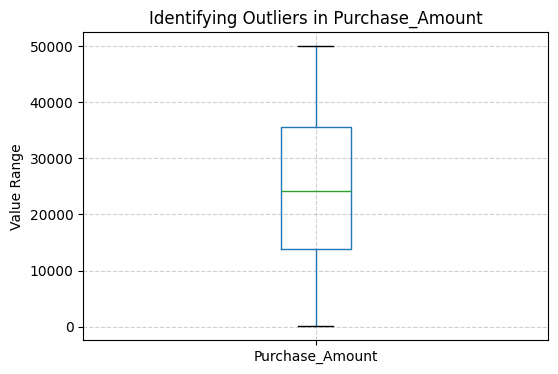

In [180]:
cols_to_plot = ['Purchase_Amount']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    # 'sym' defines the symbol for outliers (e.g., 'r.' for red dots)
    df_final.boxplot(column=[col], sym='r.')
    plt.title(f'Identifying Outliers in {col}')
    plt.ylabel('Value Range')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()